# Seaborn

Seaborn is a library for making attractive and informative statistical graphics in Python. It is built on top of matplotlib and tightly integrated with the PyData stack, including support for numpy and pandas data structures and statistical routines from scipy and statsmodels.

Library documentation: <a>http://stanford.edu/~mwaskom/software/seaborn/</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

### Themes

In [2]:
# global config settings to control things like style, font size, color palette etc.
sb.set(context="notebook", style="darkgrid", palette="dark")

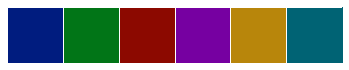

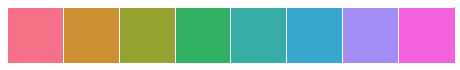

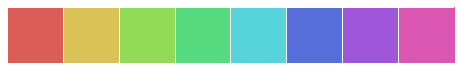

In [3]:
# seaborn has some nice built-in color palette features
sb.palplot(sb.color_palette())
sb.palplot(sb.color_palette("husl", 8))
sb.palplot(sb.color_palette("hls", 8))

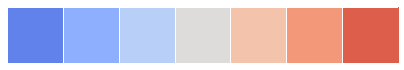

In [4]:
# matplotlib colormap of evenly spaced colors
sb.palplot(sb.color_palette("coolwarm", 7))

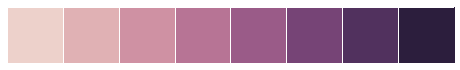

In [5]:
# sequential palette with linear increase in brightness
sb.palplot(sb.cubehelix_palette(8))

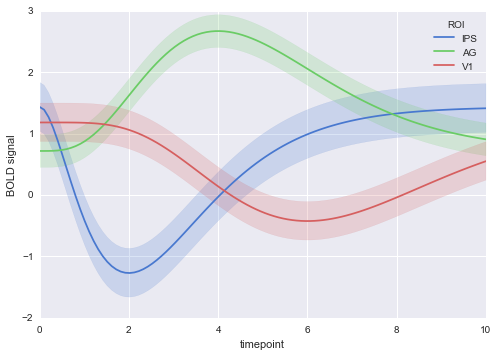

In [6]:
# palettes are used in a plot via the color paramter
gammas = sb.load_dataset("gammas")
sb.tsplot(gammas, "timepoint", "subject", "ROI", "BOLD signal", color="muted")

### Advanced Plots

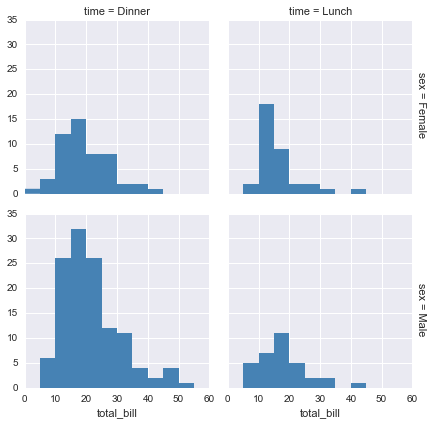

In [7]:
# facetting histograms by subsets of data
sb.set(style="darkgrid")

tips = sb.load_dataset("tips")
g = sb.FacetGrid(tips, row="sex", col="time", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "total_bill", color="steelblue", bins=bins, lw=0)

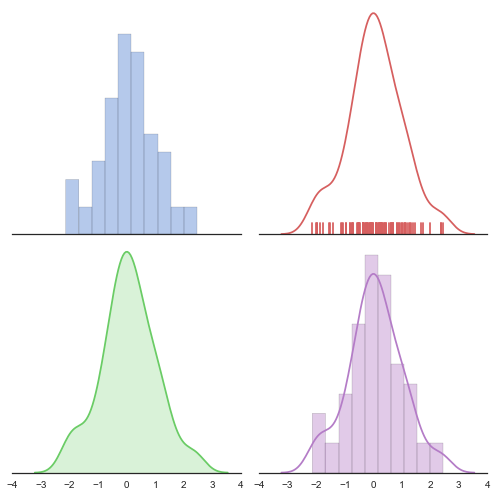

In [8]:
# several distribution plot examples
sb.set(style="white", palette="muted")
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sb.despine(left=True)

rs = np.random.RandomState(10)

b, g, r, p = sb.color_palette("muted", 4)

d = rs.normal(size=100)

sb.distplot(d, kde=False, color=b, ax=axes[0, 0])
sb.distplot(d, hist=False, rug=True, color=r, ax=axes[0, 1])
sb.distplot(d, hist=False, color=g, kde_kws={"shade": True}, ax=axes[1, 0])
sb.distplot(d, color=p, ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

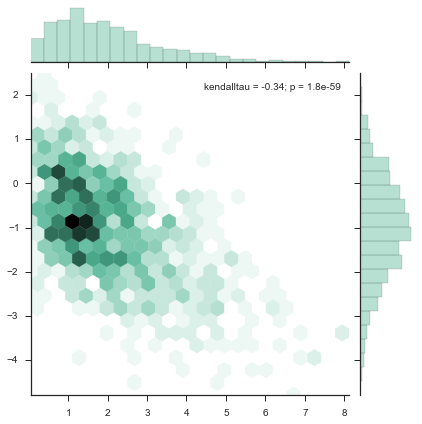

In [9]:
# hexbin plot with marginal distributions
from scipy.stats import kendalltau
sb.set(style="ticks")

rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)
sb.jointplot(x, y, kind="hex", stat_func=kendalltau, color="#4CB391")

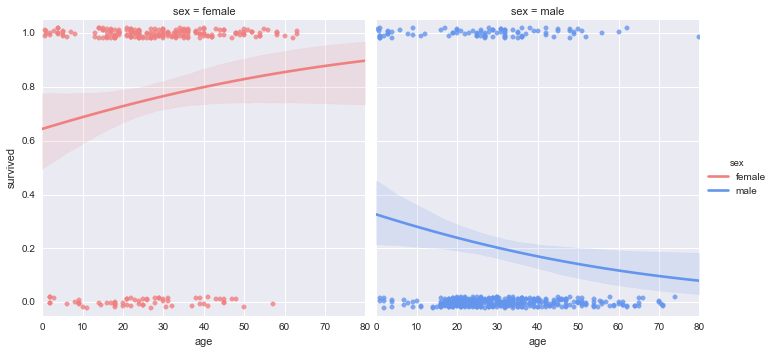

In [10]:
# faceted logistic regression
sb.set(style="darkgrid")
df = sb.load_dataset("titanic")

pal = dict(male="#6495ED", female="#F08080")
g = sb.lmplot("age", "survived", col="sex", hue="sex", data=df,
               palette=pal, y_jitter=.02, logistic=True)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))

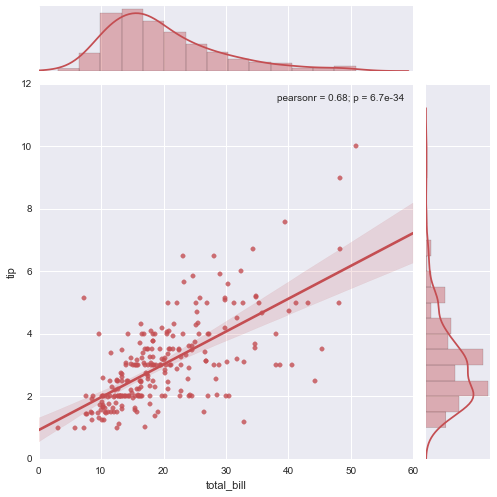

In [11]:
# linear regression with marginal distributions
sb.set(style="darkgrid")
tips = sb.load_dataset("tips")
color = sb.color_palette()[2]
g = sb.jointplot("total_bill", "tip", data=tips, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color=color, size=7)

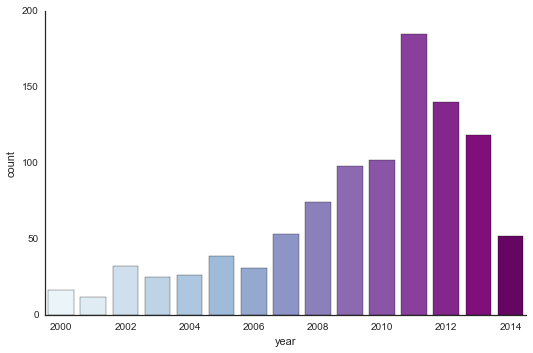

In [12]:
# time series factor plot
sb.set(style="white")
planets = sb.load_dataset("planets")
years = np.arange(2000, 2015)
g = sb.factorplot("year", data=planets, palette="BuPu",
                   aspect=1.5, x_order=years)
g.set_xticklabels(step=2)

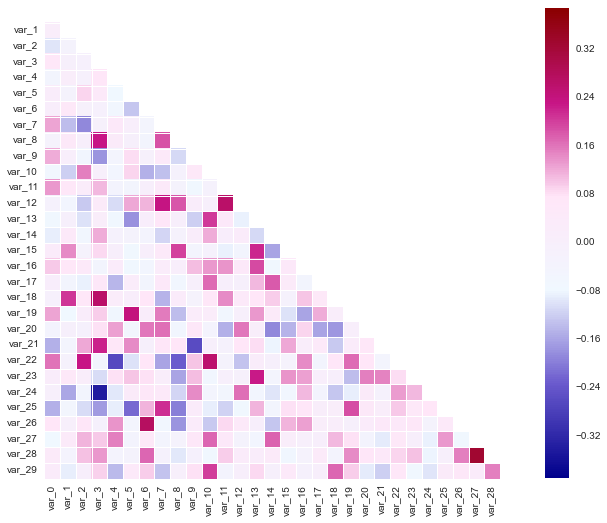

In [13]:
# correlation matrix
sb.set(style="darkgrid")

rs = np.random.RandomState(33)
d = rs.normal(size=(100, 30))

f, ax = plt.subplots(figsize=(9, 9))
cmap = sb.blend_palette(["#00008B", "#6A5ACD", "#F0F8FF",
                          "#FFE6F8", "#C71585", "#8B0000"], as_cmap=True)
sb.corrplot(d, annot=False, sig_stars=False,
             diag_names=False, cmap=cmap, ax=ax)
f.tight_layout()

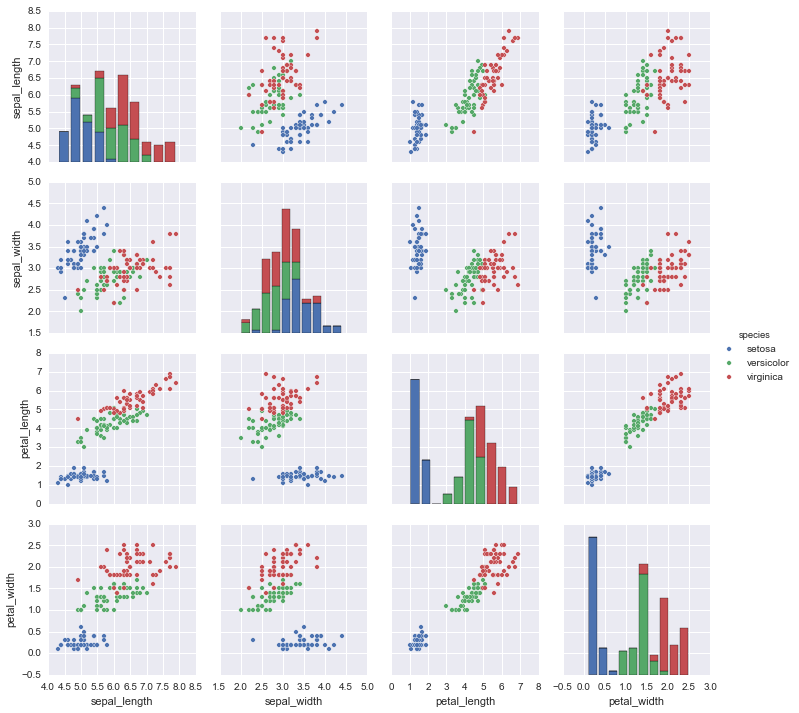

In [14]:
# pair plot example
sb.set(style="darkgrid")
df = sb.load_dataset("iris")
sb.pairplot(df, hue="species", size=2.5)

# Style and Color

We've shown a few times how to control figure aesthetics in seaborn, but let's now go over it formally:

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
tips = sns.load_dataset('tips')

## Styles

You can set particular styles:

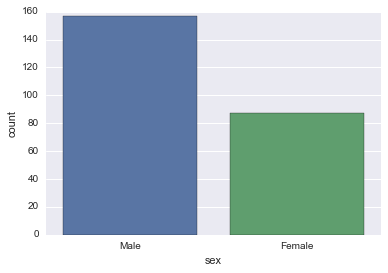

In [2]:
sns.countplot(x='sex',data=tips)

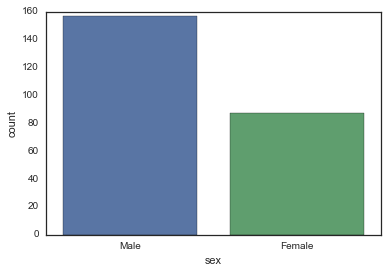

In [3]:
sns.set_style('white')
sns.countplot(x='sex',data=tips)

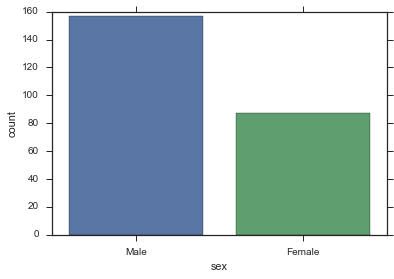

In [4]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips,palette='deep')

## Spine Removal

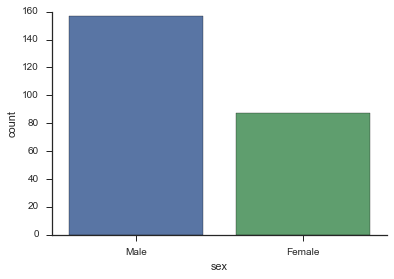

In [5]:
sns.countplot(x='sex',data=tips)
sns.despine()

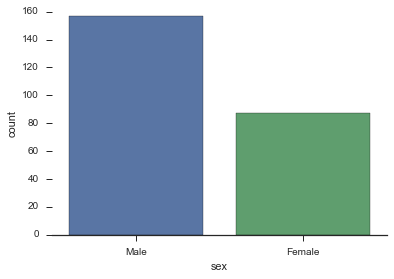

In [6]:
sns.countplot(x='sex',data=tips)
sns.despine(left=True)

## Size and Aspect

You can use matplotlib's **plt.figure(figsize=(width,height) ** to change the size of most seaborn plots.

You can control the size and aspect ratio of most seaborn grid plots by passing in parameters: size, and aspect. For example:

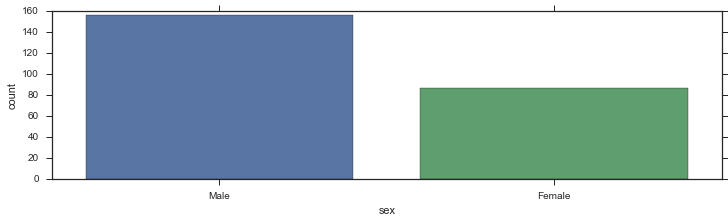

In [11]:
# Non Grid Plot
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)

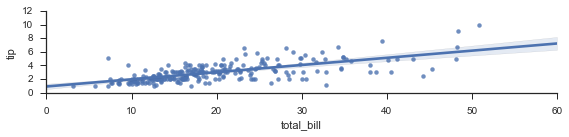

In [13]:
# Grid Type Plot
sns.lmplot(x='total_bill',y='tip',size=2,aspect=4,data=tips)

## Scale and Context

The set_context() allows you to override default parameters:

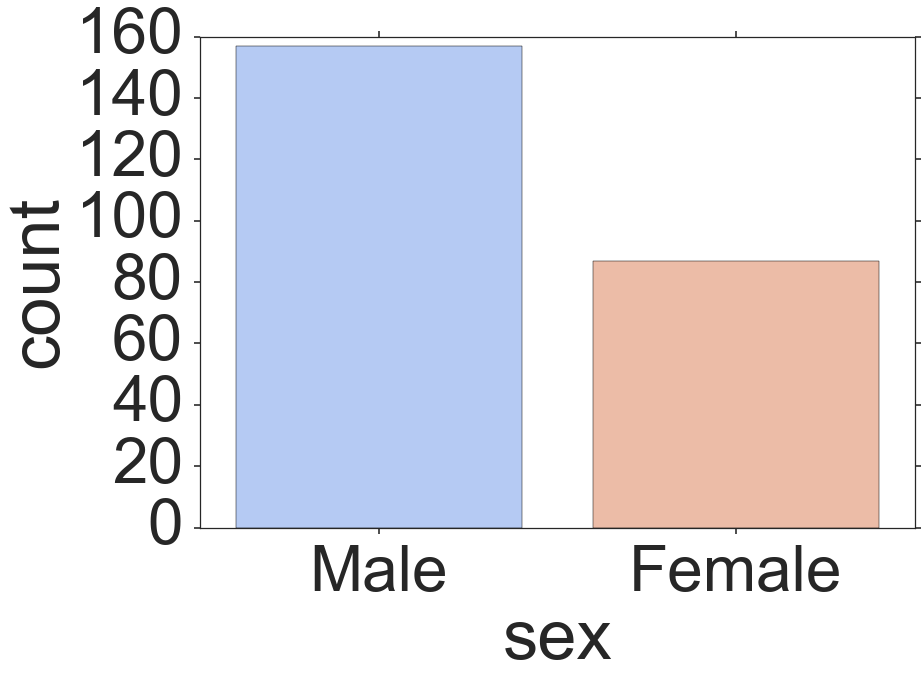

In [17]:
sns.set_context('poster',font_scale=4)
sns.countplot(x='sex',data=tips,palette='coolwarm')

# Grids

Grids are general types of plots that allow you to map plot types to rows and columns of a grid, this helps you create similar plots separated by features.

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
iris = sns.load_dataset('iris')

In [28]:
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## PairGrid

Pairgrid is a subplot grid for plotting pairwise relationships in a dataset.

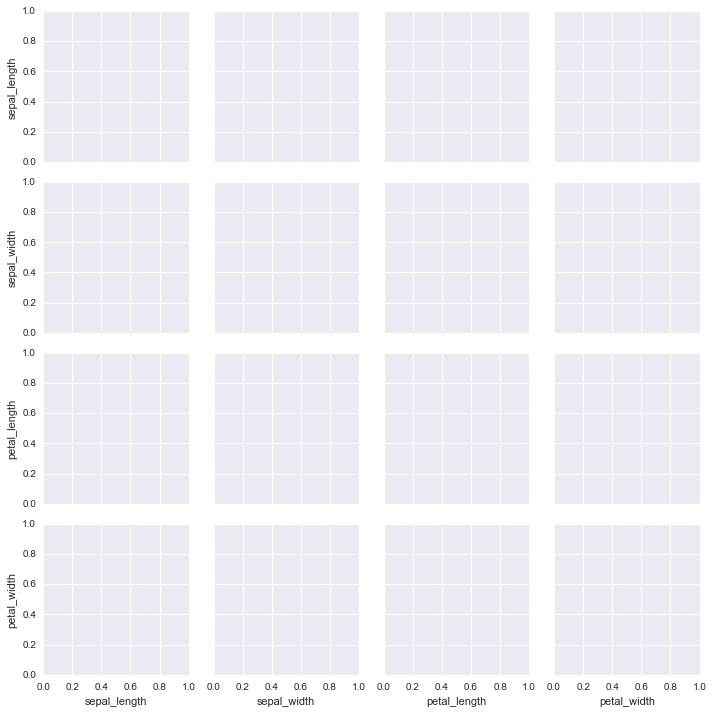

In [25]:
# Just the Grid
sns.PairGrid(iris)

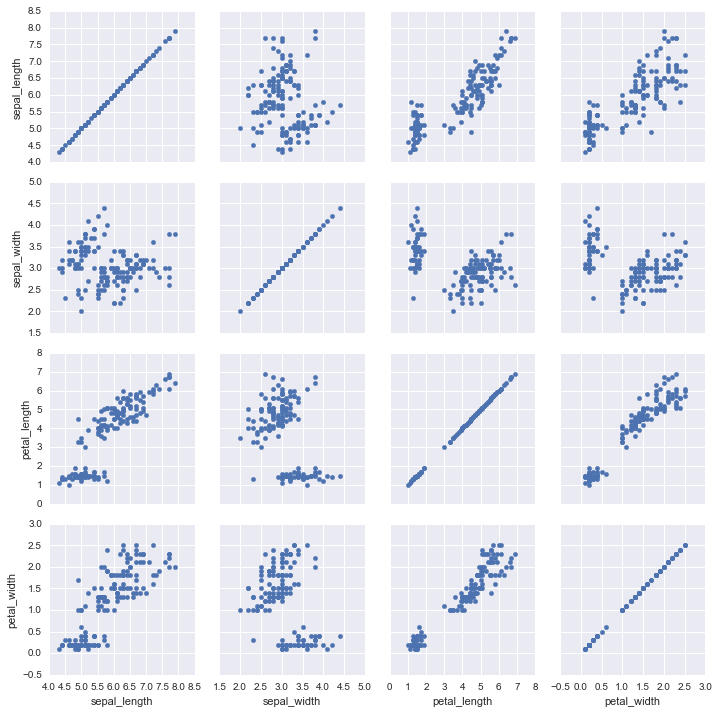

In [26]:
# Then you map to the grid
g = sns.PairGrid(iris)
g.map(plt.scatter)

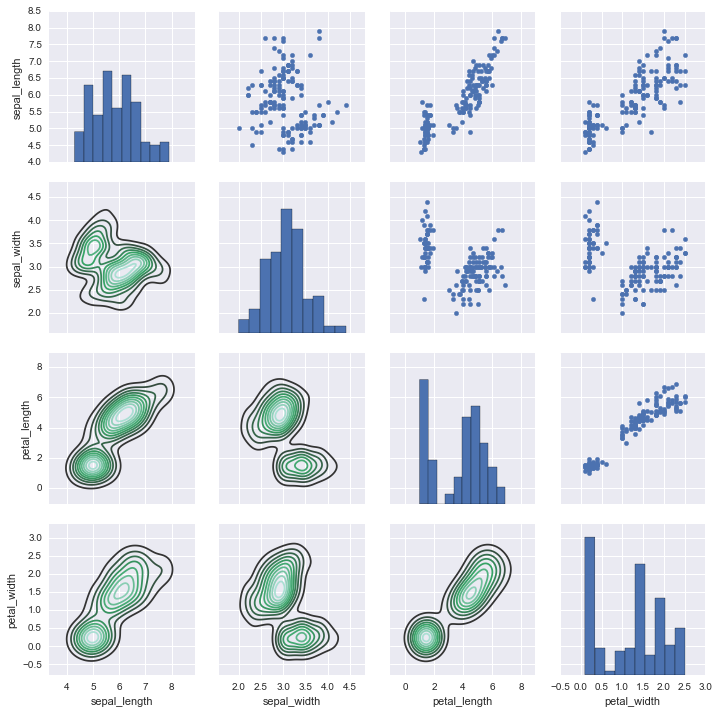

In [30]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

## pairplot

pairplot is a simpler version of PairGrid (you'll use quite often)

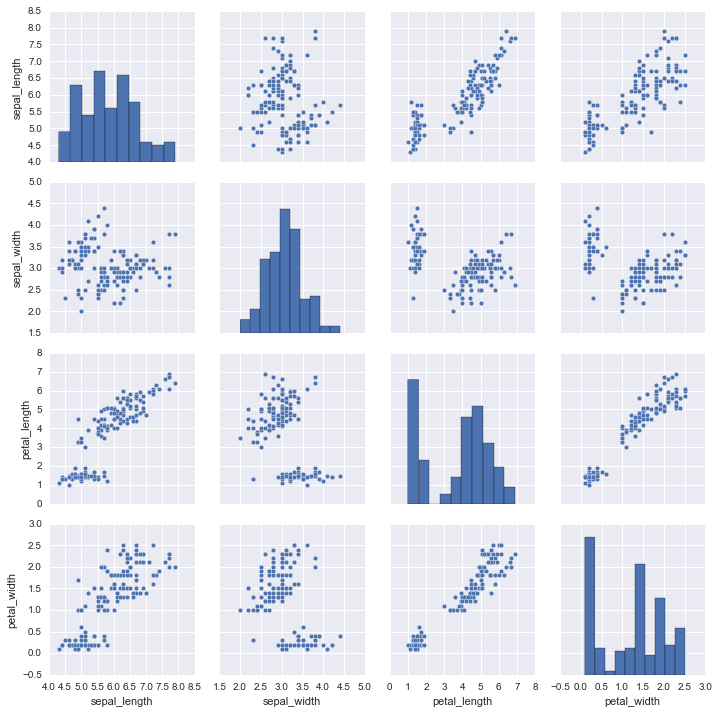

In [31]:
sns.pairplot(iris)

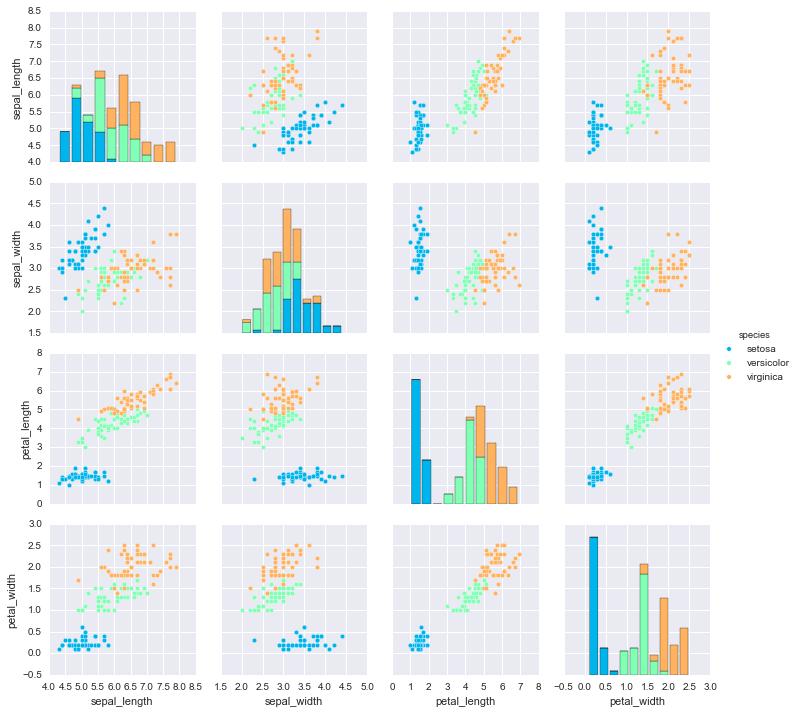

In [33]:
sns.pairplot(iris,hue='species',palette='rainbow')

## Facet Grid

FacetGrid is the general way to create grids of plots based off of a feature:

In [34]:
tips = sns.load_dataset('tips')

In [35]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


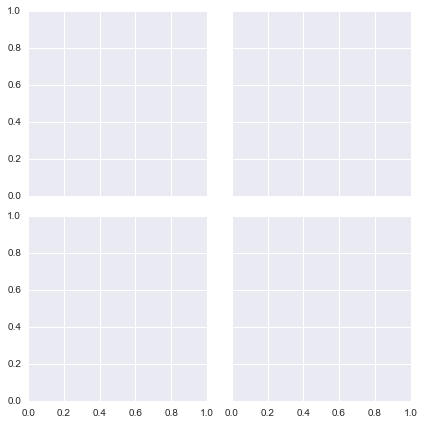

In [36]:
# Just the Grid
g = sns.FacetGrid(tips, col="time", row="smoker")

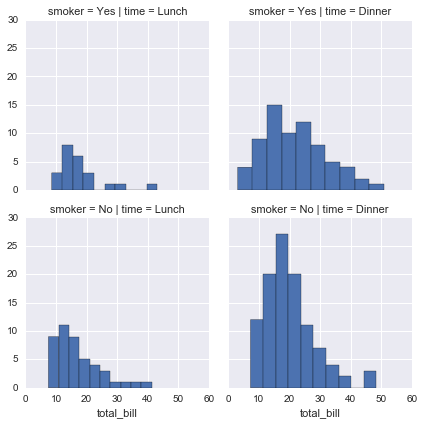

In [37]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

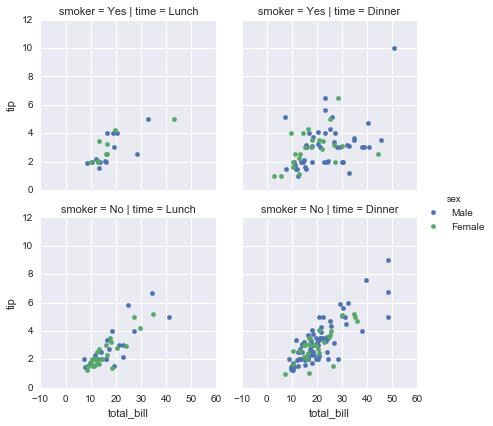

In [42]:
g = sns.FacetGrid(tips, col="time",  row="smoker",hue='sex')
# Notice hwo the arguments come after plt.scatter call
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

## JointGrid

JointGrid is the general version for jointplot() type grids, for a quick example:

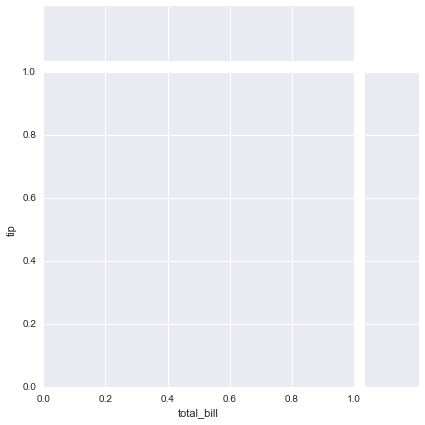

In [43]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


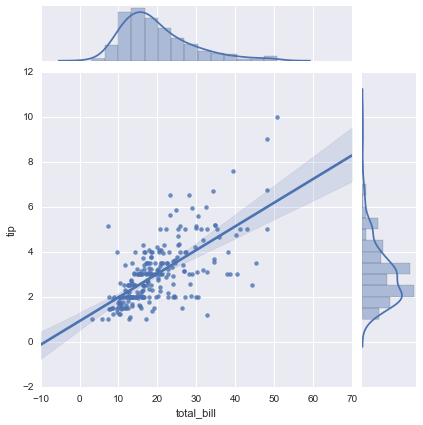

In [45]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.distplot)

# Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

Let's begin by exploring seaborn's heatmap and clutermap:

In [1]:
import seaborn as sns
%matplotlib inline

In [7]:
flights = sns.load_dataset('flights')

In [10]:
tips = sns.load_dataset('tips')

In [11]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


## Heatmap

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example:

In [12]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
# Matrix form for correlation data
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


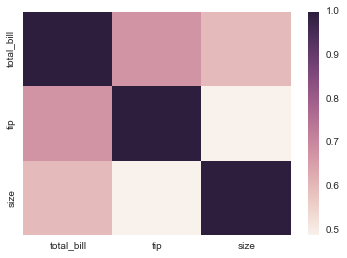

In [16]:
sns.heatmap(tips.corr())

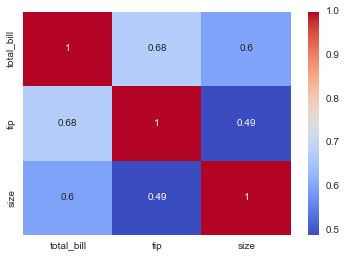

In [19]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)

Or for the flights data:

In [23]:
flights.pivot_table(values='passengers',index='month',columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


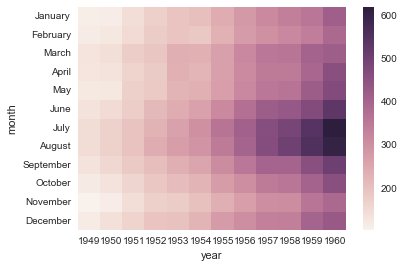

In [24]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights)

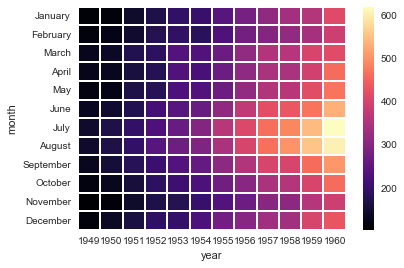

In [30]:
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1)

## clustermap

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap. For example:

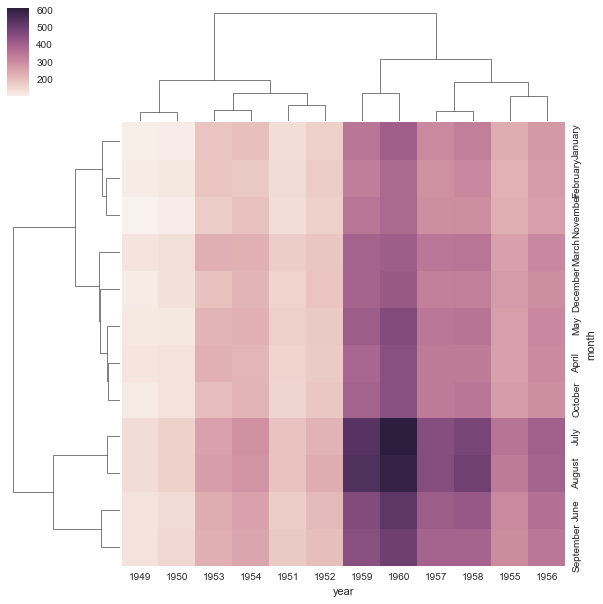

In [31]:
sns.clustermap(pvflights)

Notice now how the years and months are no longer in order, instead they are grouped by similarity in value (passenger count). That means we can begin to infer things from this plot, such as August and July being similar (makes sense, since they are both summer travel months)

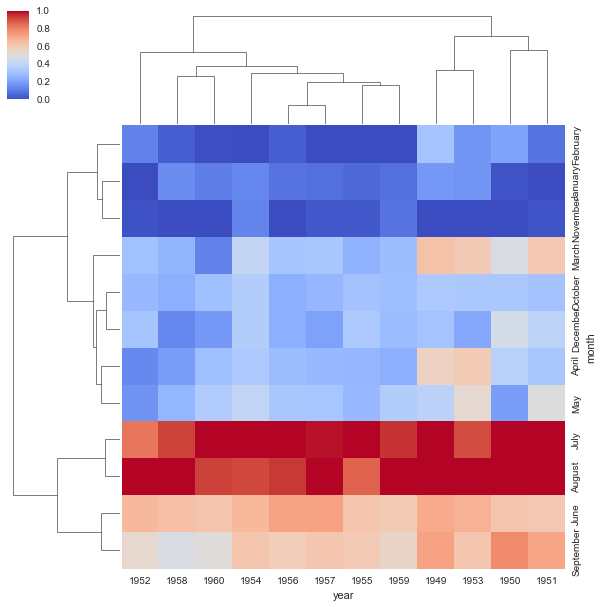

In [34]:
# More options to get the information a little clearer like normalization
sns.clustermap(pvflights,cmap='coolwarm',standard_scale=1)

# Categorical Data Plots

Now let's discuss using seaborn to plot categorical data! There are a few main plot types for this:

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

Let's go through examples of each!

In [5]:
import seaborn as sns
%matplotlib inline

In [6]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## barplot and countplot

These very similar plots allow you to get aggregate data off a categorical feature in your data. **barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

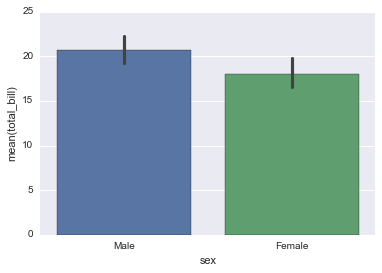

In [8]:
sns.barplot(x='sex',y='total_bill',data=tips)

In [10]:
import numpy as np

You can change the estimator object to your own function, that converts a vector to a scalar:

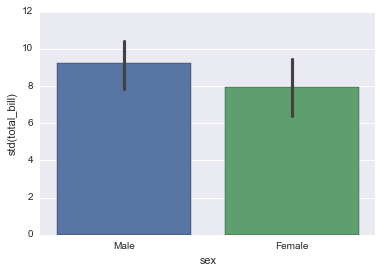

In [11]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

### countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

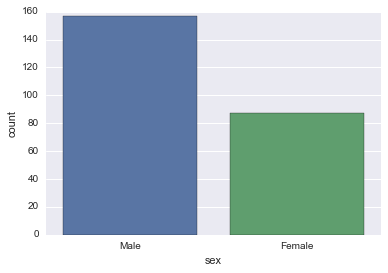

In [13]:
sns.countplot(x='sex',data=tips)

## boxplot and violinplot

boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

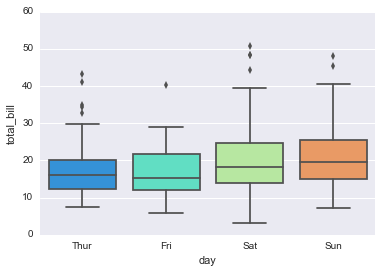

In [22]:
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow')

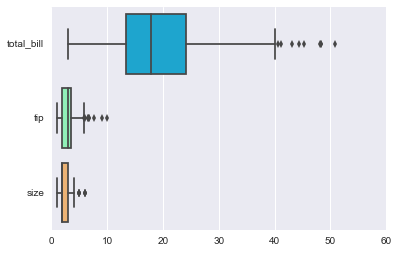

In [25]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=tips,palette='rainbow',orient='h')

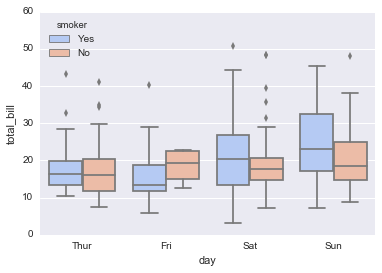

In [26]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")

### violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

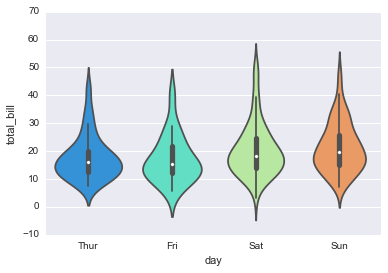

In [27]:
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow')

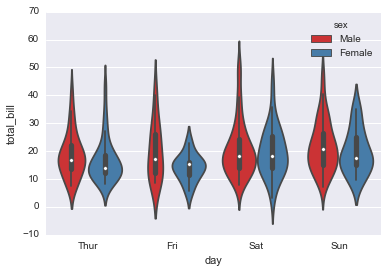

In [37]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',palette='Set1')

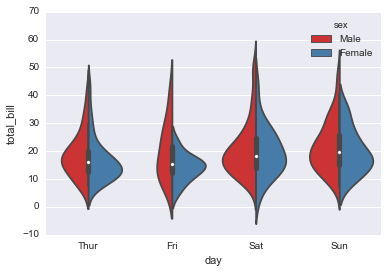

In [36]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Set1')

## stripplot and swarmplot
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

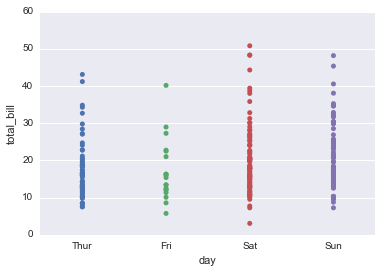

In [38]:
sns.stripplot(x="day", y="total_bill", data=tips)

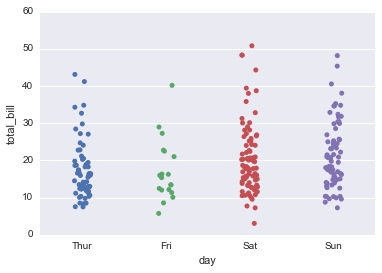

In [39]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True)

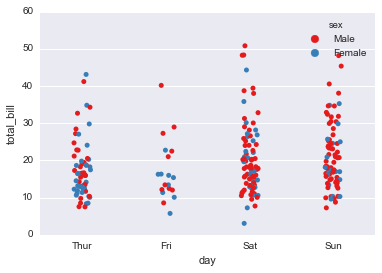

In [42]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1')

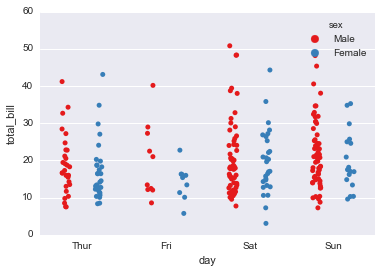

In [43]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1',split=True)

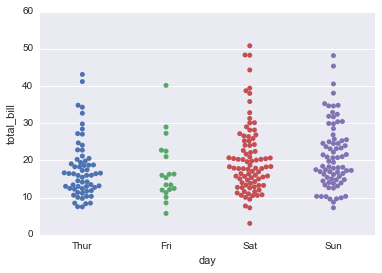

In [44]:
sns.swarmplot(x="day", y="total_bill", data=tips)

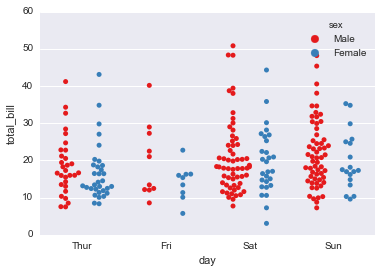

In [47]:
sns.swarmplot(x="day", y="total_bill",hue='sex',data=tips, palette="Set1", split=True)

### Combining Categorical Plots

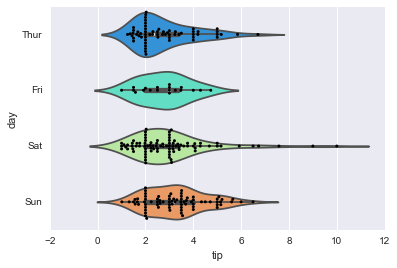

In [61]:
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3)

## factorplot

factorplot is the most general form of a categorical plot. It can take in a **kind** parameter to adjust the plot type:

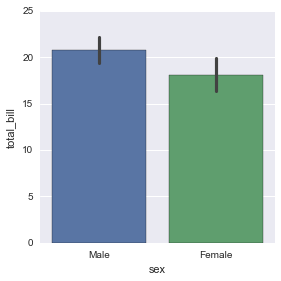

In [15]:
sns.factorplot(x='sex',y='total_bill',data=tips,kind='bar')

# Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

___
## Imports

In [2]:
import seaborn as sns
%matplotlib inline

## Data
Seaborn comes with built-in data sets!

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## distplot

The distplot shows the distribution of a univariate set of observations.

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


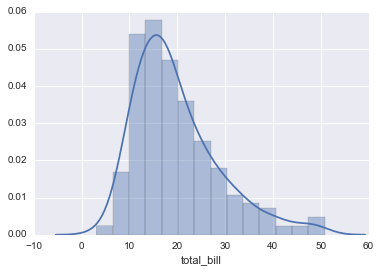

In [16]:
sns.distplot(tips['total_bill'])
# Safe to ignore warnings

To remove the kde layer and just have the histogram use:

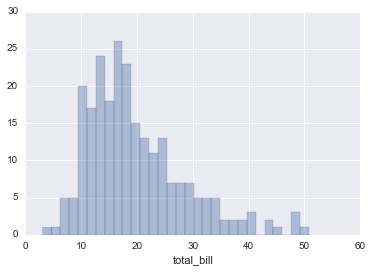

In [9]:
sns.distplot(tips['total_bill'],kde=False,bins=30)

## jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

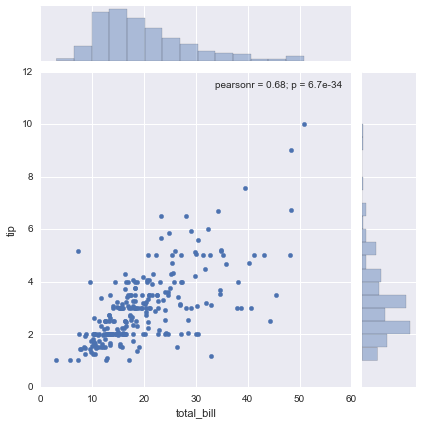

In [12]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

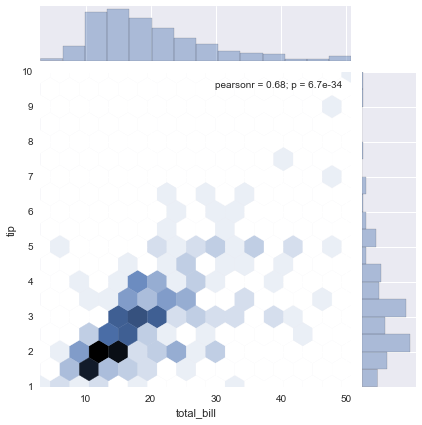

In [15]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


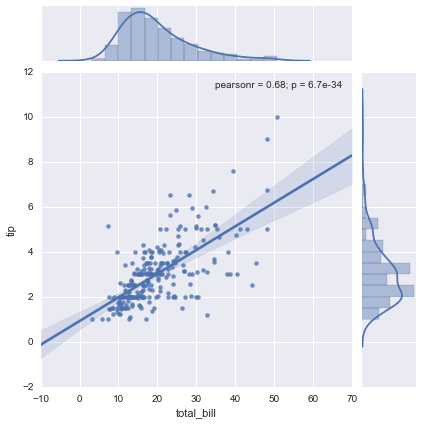

In [17]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

## pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

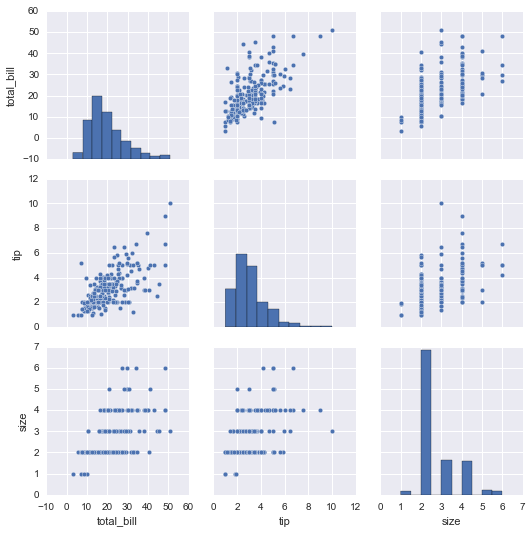

In [18]:
sns.pairplot(tips)

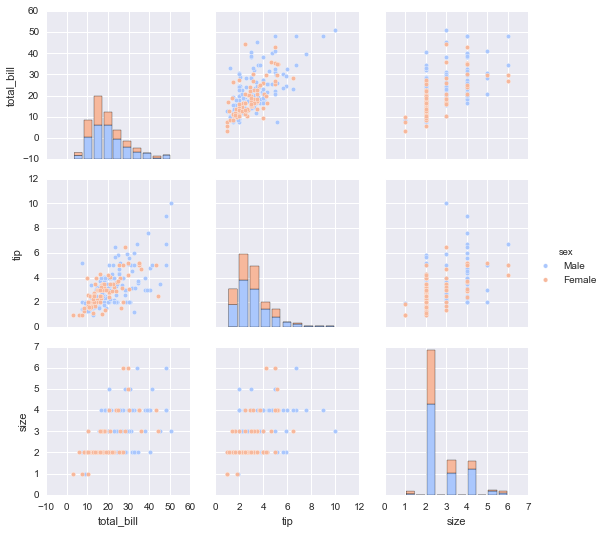

In [21]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

## rugplot

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

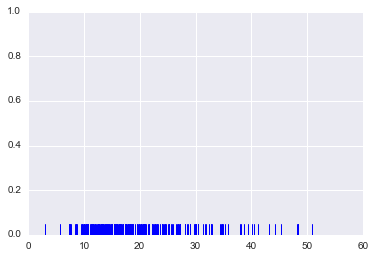

In [22]:
sns.rugplot(tips['total_bill'])

## kdeplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

(0, 1)

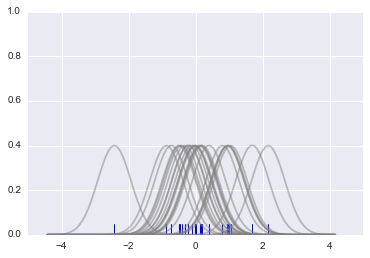

In [35]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

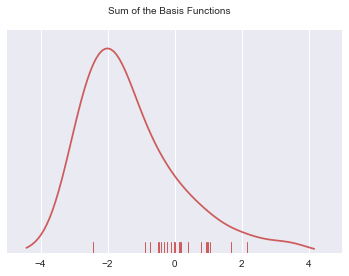

In [37]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

So with our tips dataset:

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


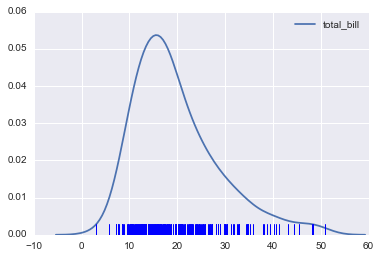

In [41]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


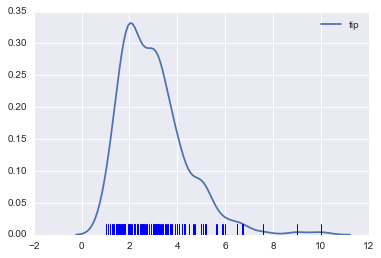

In [42]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

# Great Job!

___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Regression Plots

Seaborn has many built-in capabilities for regression plots, however we won't really discuss regression until the machine learning section of the course, so we will only cover the **lmplot()** function for now.

**lmplot** allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, as well as coloring the hue based off of features.

Let's explore how this works:

In [1]:
import seaborn as sns
%matplotlib inline

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## lmplot()

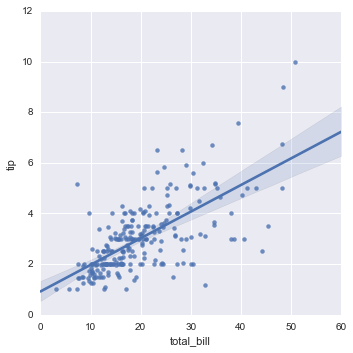

In [5]:
sns.lmplot(x='total_bill',y='tip',data=tips)

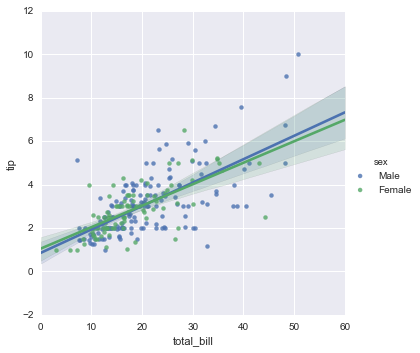

In [6]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

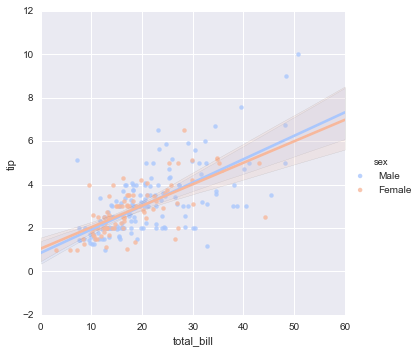

In [13]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm')

### Working with Markers

lmplot kwargs get passed through to **regplot** which is a more general form of lmplot(). regplot has a scatter_kws parameter that gets passed to plt.scatter. So you want to set the s parameter in that dictionary, which corresponds (a bit confusingly) to the squared markersize. In other words you end up passing a dictionary with the base matplotlib arguments, in this case, s for size of a scatter plot. In general, you probably won't remember this off the top of your head, but instead reference the documentation.

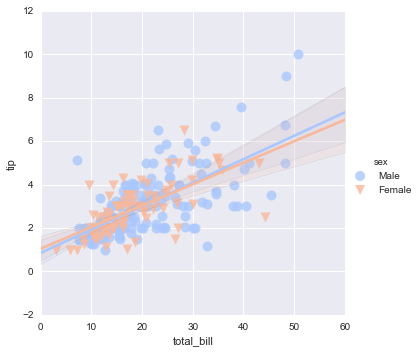

In [16]:
# http://matplotlib.org/api/markers_api.html
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm',
           markers=['o','v'],scatter_kws={'s':100})

## Using a Grid

We can add more variable separation through columns and rows with the use of a grid. Just indicate this with the col or row arguments:

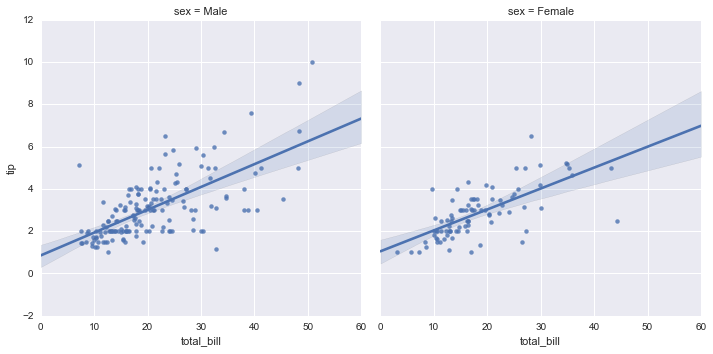

In [28]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex')

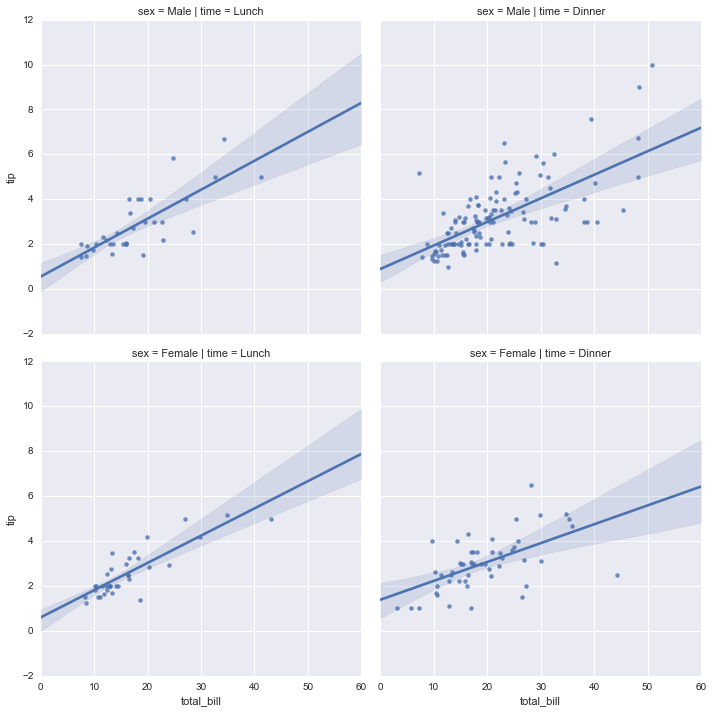

In [30]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time",data=tips)

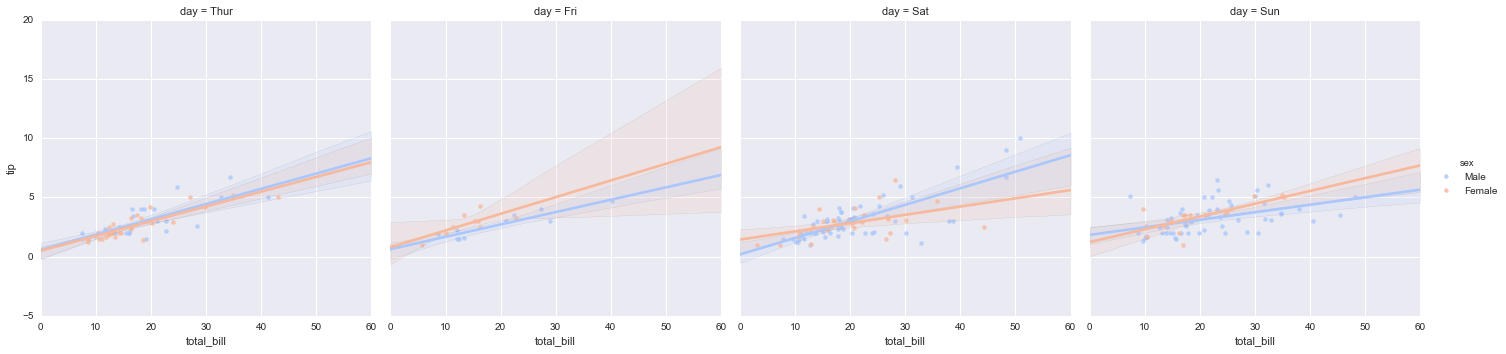

In [24]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm')

## Aspect and Size

Seaborn figures can have their size and aspect ratio adjusted with the **size** and **aspect** parameters:

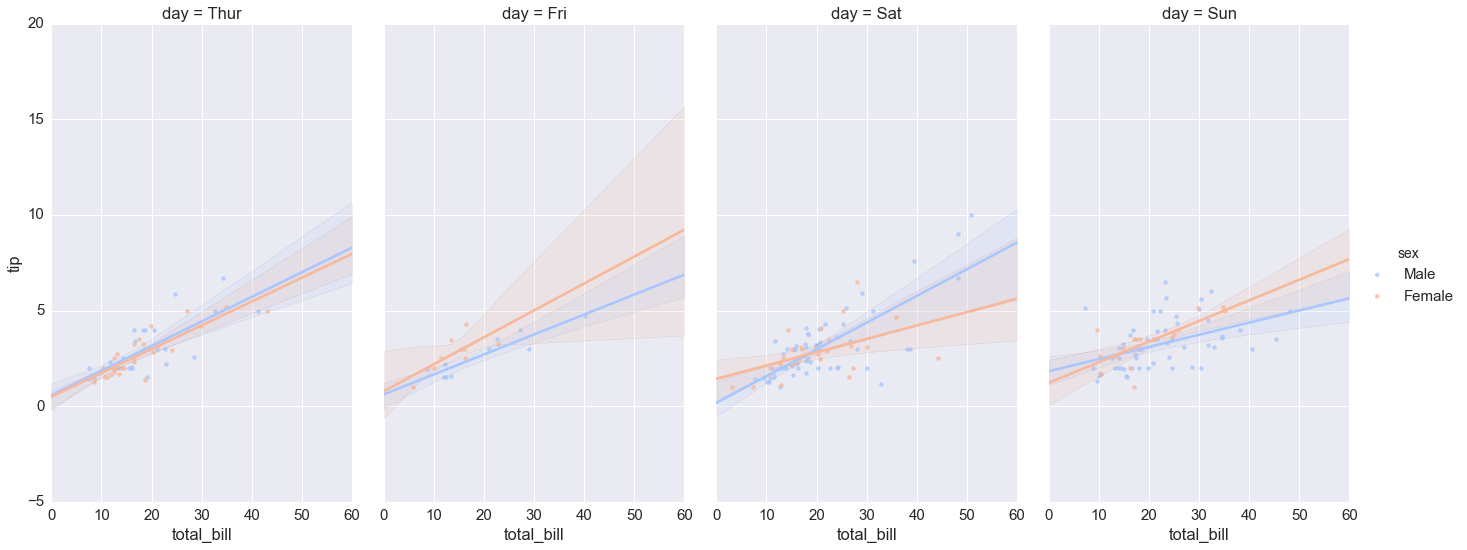

In [36]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm',
          aspect=0.6,size=8)

You're probably wondering how to change the font size or control the aesthetics even more, check out the Style and Color Lecture and Notebook for more info on that!

# Great Job!

## The Data

We will be working with a famous titanic data set for these exercises. Later on in the Machine Learning section of the course, we will revisit this data, and use it to predict survival rates of passengers. For now, we'll just focus on the visualization of the data with seaborn:

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
sns.set_style('whitegrid')

In [28]:
titanic = sns.load_dataset('titanic')

In [40]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Exercises



In [42]:
# CODE HERE
# REPLICATE EXERCISE PLOT IMAGE BELOW
# BE CAREFUL NOT TO OVERWRITE CELL BELOW
# THAT WOULD REMOVE THE EXERCISE PLOT IMAGE!

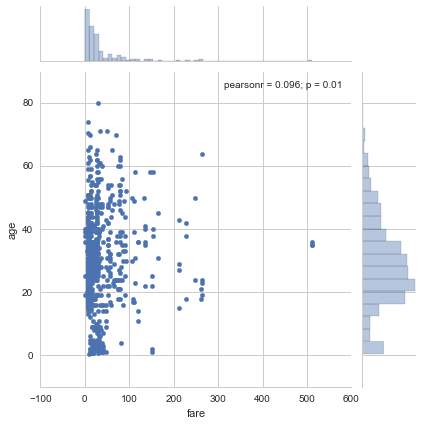

In [41]:
sns.jointplot(x='fare',y='age',data=titanic)

In [43]:
# CODE HERE
# REPLICATE EXERCISE PLOT IMAGE BELOW
# BE CAREFUL NOT TO OVERWRITE CELL BELOW
# THAT WOULD REMOVE THE EXERCISE PLOT IMAGE!

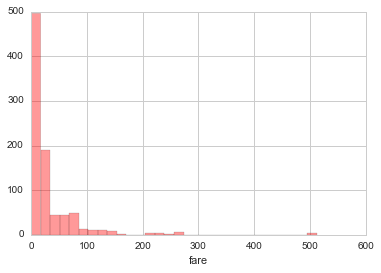

In [44]:
sns.distplot(titanic['fare'],bins=30,kde=False,color='red')

In [ ]:
# CODE HERE
# REPLICATE EXERCISE PLOT IMAGE BELOW
# BE CAREFUL NOT TO OVERWRITE CELL BELOW
# THAT WOULD REMOVE THE EXERCISE PLOT IMAGE!

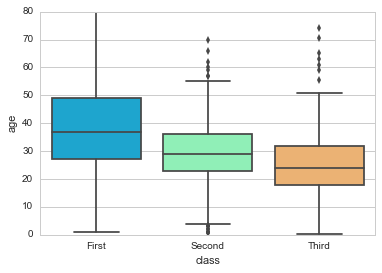

In [45]:
sns.boxplot(x='class',y='age',data=titanic,palette='rainbow')

In [ ]:
# CODE HERE
# REPLICATE EXERCISE PLOT IMAGE BELOW
# BE CAREFUL NOT TO OVERWRITE CELL BELOW
# THAT WOULD REMOVE THE EXERCISE PLOT IMAGE!

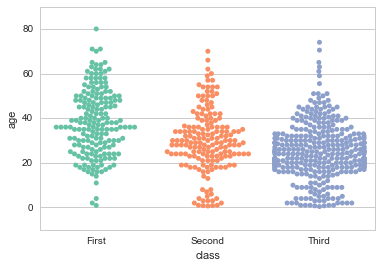

In [46]:
sns.swarmplot(x='class',y='age',data=titanic,palette='Set2')

In [ ]:
# CODE HERE
# REPLICATE EXERCISE PLOT IMAGE BELOW
# BE CAREFUL NOT TO OVERWRITE CELL BELOW
# THAT WOULD REMOVE THE EXERCISE PLOT IMAGE!

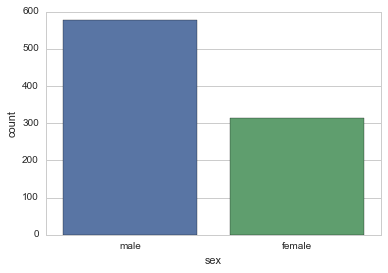

In [47]:
sns.countplot(x='sex',data=titanic)

In [ ]:
# CODE HERE
# REPLICATE EXERCISE PLOT IMAGE BELOW
# BE CAREFUL NOT TO OVERWRITE CELL BELOW
# THAT WOULD REMOVE THE EXERCISE PLOT IMAGE!

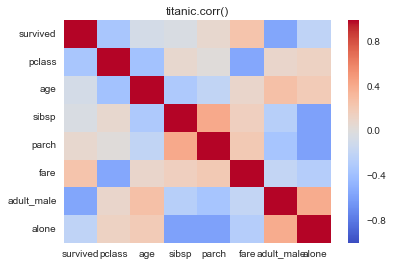

In [48]:
sns.heatmap(titanic.corr(),cmap='coolwarm')
plt.title('titanic.corr()')

In [ ]:
# CODE HERE
# REPLICATE EXERCISE PLOT IMAGE BELOW
# BE CAREFUL NOT TO OVERWRITE CELL BELOW
# THAT WOULD REMOVE THE EXERCISE PLOT IMAGE!

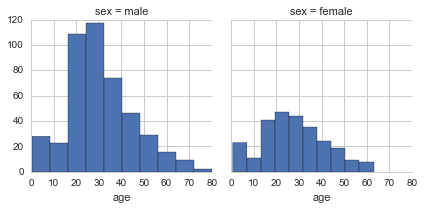

In [49]:
g = sns.FacetGrid(data=titanic,col='sex')
g.map(plt.hist,'age')

# Great Job!
